In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import os 
import glob
import imageio

path_files = Path("/home/superai052/super_workspace/Data_train/dataset/dataset_v1/images/")
path = Path("/home/superai052/super_workspace/Data_train/dataset/")

In [2]:
data_train = pd.read_csv(path / "train.csv")
data_test = pd.read_csv(path / "test.csv")
data_val = pd.read_csv(path / "val.csv")
data = pd.read_csv(path / "data.csv")
data_list_image = list(path_files.glob("*.png"))

In [9]:
X = []
for idx,name in enumerate(data_train.path):
    img = imageio.imread(path_files / name.split("/")[-1])
    img = img / 255.
    if idx % 1000 == 0:
        print(idx)
    X.append(img[:,:,1])

# X = np.array(X)
# y = np.array(data_train.label)

/tmp/ipykernel_126896/3603377570.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path_files / name.split("/")[-1])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


(256, 256, 4)


/tmp/ipykernel_100671/702527357.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(data_list_image[0])


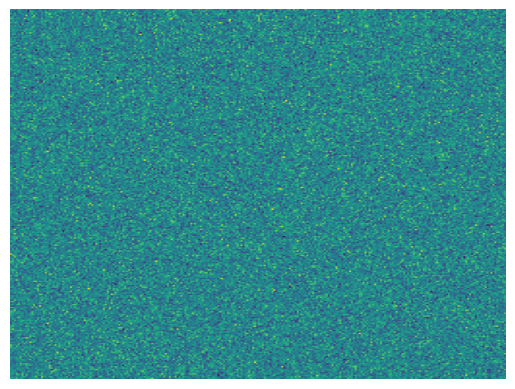

In [14]:
import imageio
img = imageio.imread(data_list_image[0])
print(img.shape)
plt.axis('off')
plt.imshow(img, cmap='gray', aspect='auto')

In [ ]:
import numpy as np
import imageio
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load your data (assuming you already have the X and y lists)
X = np.array(X)  # (26541, 255, 255, 4)
y = np.array(data_train.label)  # (26541,)

# Convert labels to one-hot encoding
num_classes = 8
y = to_categorical(y, num_classes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 4)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

del data_train , data_list_image , data

# Prepare data
X = np.array(X)  # (23803, 256, 256)
X = np.expand_dims(X, axis=-1)  # Add a channel dimension (23803, 256, 256, 1)
y = np.array(data_train.label)  # (23803,)
y = to_categorical(y)  # Convert labels to one-hot encoding

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
